# 레드 와인, 화이트 와인 분류하기

## 데이터 수집(학습에 사용할 데이터) -> 데이터 정리(학습에 사용할 데이터) -> 학습 -> 사용(실제 데이터)

# 데이터 가져오기

In [1]:
import pandas as pd

In [2]:
wine_url = 'https://raw.githubusercontent.com/mansik/python-project-20230118/master/data/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


* 와인 데이터는 화학 성분으로 되어 있으며, color 칼럼에는 레드 와인(1), 화이트 와인(0)으로 구분되어 있다
* fixed acidity: 고정 산도
* volatile acidity: 휘발성 산도
* citric acid: 시트르산
* residual sugar: 잔류 당분
* chlorides: 염화물
* free sulfur dioxide: 자유 이산화황
* total sulfur dioxide: 총 이산화황
* density: 밀도
* pH
* sulphates: 황산염
* alcohol 	
* quality: 0~10(높을수록 좋은 품질)
* color

In [3]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

# 학습용 데이터 만들기

In [4]:
# 레드/화이트 와인을 구분하는 것이 목표이므로 color 칼럼은 y라는 변수에, 나머지는 X라는 변수에 저장
y = wine['color']
X = wine.drop(['color'], axis=1)  #axis=1은 column을 의미,  X = wine.drop(columns=['color'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: color, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 20%로 테스트 데이터와 훈련용 데이터를 분리하도록 한다.
# 이 의미는 X_train, y_train으로 학습하고, 학습 완료된 모델에 X_test 데이터로 예측해서 y_test와 비교하겠다는 뜻이다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
import numpy as np

In [9]:
# y_train 변수에 적절히 화이트/레드 와인이 잘 섞여 있는 것을 확인할 수 있다.
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

# 로지스틱 회귀로 학습하기

* 로지스틱 회귀는 선형회귀 모델의 마지막 단을 sigmoid 함수를 사용한 것이다.

## 모델 수립

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=13, solver='liblinear')

## 훈련 데이터(X_train)로 예측한 정확도 확인

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# accuracy_score(y_train, pred) : X_train 데이터로 모델에 예측시켜서 나온 결과(pred)를 y_train과 비교한 정확도
pred = log_reg.predict(X_train)
accuracy_score(y_train, pred)

0.9874927842986339

* accuracy_score 를 불러서 X_train 데이터로 모델에 예측시켜서, y_train 과 비교하면 98.7%의 정확도가 나타난다.

## 검증 데이터(X_test)로 예측한 정확도 확인

In [14]:
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9876923076923076

* 우리의 예측 모델을 테스트하기 위해 따로 빼둔 X_test 데이터를 log_reg모델에 predict해서 정답(y_test)과 비교해서 정확도를 확인
* 98.8%의 정확도를 가지므로 이 모델은 사용하기에 적정하다.

## 분류문제에서 어떻게 데이터가 예측과 오류가 있는지 확인(confusion_matrix)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test, pred)

array([[980,   5],
       [ 11, 304]], dtype=int64)

* confusion_matrix는 분류문제에서 어떻게 데이터가 예측과 오류가 있는지 확인할 수 있다.
* 위의 결과 첫줄은 화이트 와인(0)을 화이트 와인으로 분류한 것이 980개, 레드 와인으로 분류한 것이 5개라는 뜻이다.
* 2번째 줄은 레드 와인(1)을 화이트 와인으로 잘못 분류한 것이 11개, 레드 와인으로  잘 분류한 것이 304개라는 뜻이다.

# 데이터 정규화

In [17]:
import seaborn as sns

## boxplot로 데이터 분포 확인

<AxesSubplot: >

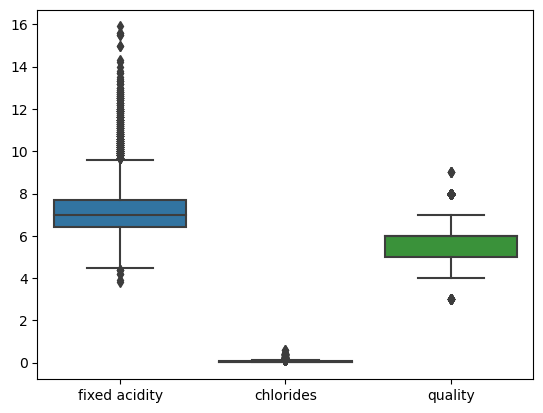

In [18]:
sns.boxplot(data=X[['fixed acidity', 'chlorides', 'quality']])

* 세 개의 특성이 평균도 데이터가 분포하는 폭도 다르다는 것을 알 수 있다.
* 이럴 때 학습의 결과가 나쁠 수 있다.
* 이를 더 잘 학습하게 하기 위해 조금 다른 작업을 하는 경우가 있다.

## MinMaxScaler, StandardScaler 정규화

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

* MinMaxScaler는 데이터를 0과 1로 강제로 다시 매핑하는 것
* StandardScaler는 평균을 0으로 표준편차를 1로 바꾸는 작업을 한다.

In [21]:
# 각각의 데이터를 다시 pandas의 DataFrame으로 표현
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [22]:
X_ss_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [23]:
X_mms_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


## 다시 데이터 분포 확인

<AxesSubplot: >

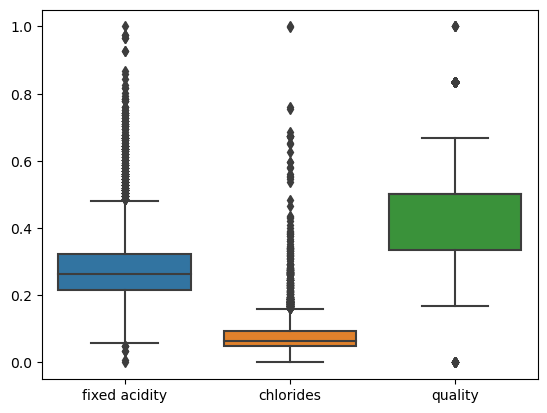

In [24]:
# MinMaxScaler에 의해 만들어진 데이터 분포 확인
sns.boxplot(data=X_mms_pd[['fixed acidity', 'chlorides', 'quality']])

* MinMaxScaler는 모든 데이터를 0과 1 사이에 위치시키는 것으로그 안에서 평균은 서로 다르다.

<AxesSubplot: >

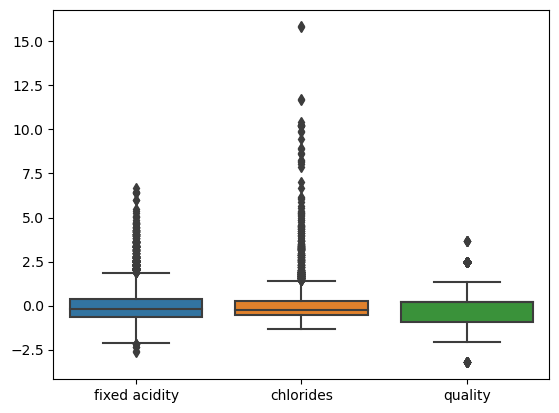

In [25]:
# StandardScaler에 의해 만들어진 데이터 분포 확인
sns.boxplot(data=X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

* 그에 반해 StandardScaler는 위 결과에서 보이듯이 평균을 0으로 표준편차를 1로 만들어서 보여주는 것이다.

# 정규화된 데이터를 이용하여 학습

In [26]:
X_out = X_mms_pd
X_train, X_test, y_train, y_test = train_test_split(X_out, y, test_size=0.2, random_state=13)

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9884615384615385

* MinMaxScaler 가 적용된 데이터를 
* 다시 훈련용과 학습용으로 나눠서
* 로지스틱 회귀를 적용해서 테스트용 데이터의 정확도를 확인했는데
* 기존의 결과와 큰 차이가 없음을 알 수 있다.

In [27]:
X_out = X_ss_pd
X_train, X_test, y_train, y_test = train_test_split(X_out, y, test_size=0.2, random_state=13)

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9969230769230769

* 이번에는 StandardScaler 가 적용된 데이터를 이용한 결과를 확인했는데 결과가 많이 개선되었다.
* 99.7%로 나타났다.
* 그렇다면 이 데이터에서는 정규화가 유의미한 결과를 가진다는 것을 확인했다.

# 결정나무를 이용한 분류

* 결정나무를 이용하면 어떤 특성이 결과에 영향을 많이 주었는지 확인할 수 있다.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [30]:
pred = tree_clf.predict(X_train)
accuracy_score(y_train, pred)

0.9553588608812776

In [31]:
pred = tree_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9569230769230769

* 결정나무의 결과도 나쁘지 않다.

In [32]:
confusion_matrix(y_test, pred)

array([[939,  46],
       [ 10, 305]], dtype=int64)

* confusion_matrix의 결과도 로지스틱 회귀와 크게 다르지 않다.

In [33]:
from graphviz import Source
from sklearn.tree import export_graphviz

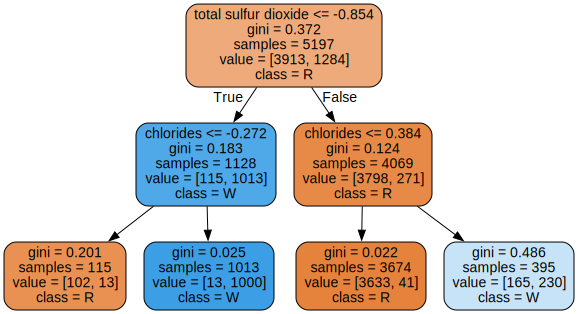

In [34]:
Source(export_graphviz(tree_clf, 
                       feature_names=X_train.columns,
                       class_names=['R', 'W'],
                       rounded=True,
                       filled=True))

* total sulfur dioxide와 chlorides가 많은 레드 와인과 화이트 와인을 분류하는 중요한 특성이라는 것을 알 수 있다.